# Трапер Максим 24.М82
# Домашнее задание №1. Разведочный анализ данных
## Задание:
1. Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте kaggle, UCI репозитория, Google Dataset Search и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.

2. Считать данные и вывести их основные характеристики, описание признаков. Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.

3. (+2 балла) Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.

4. Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.

5. (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).

6. (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (Feature Engineering).

# 1. Загрузка и проверка данных

In [226]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [227]:
df = pd.read_csv('./Dataset/data.csv')

In [228]:
df.head(5).T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [229]:
# Приводим названия столбцов в SnakeCase
df.columns = list(map(lambda x: x.replace(' ', '_').lower(), df.columns))
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


Датасет содержит данные об автомобилях и их ценах. Рассмотрим признаки:

1. make - производитель

2. model - модель

3. year - год производства

4. engine_fuel_type - Тип двигателя

5. engine_hp - кол-во лошадиных сил

6. engine_cylinders - кол-во цилиндров двигателя

7. transmission_type - тип трансмиссии

8. driven_wheels - кол-во ведущих колёс

9. number_of_doors - кол-во дверей

10. market_category - рыночные характеристики машины (?)

11. vehicle_size - размер машины

12. vehicle_style - тип машины

13. highway_mpg - миль на галлон по шоссе

14. city_mpg - миль на галлон по городу

15. popularity - популярность

16. msrp - рекомендованная производителем розничная цена (**Целевая переменная**)

# 2. Обработка пустых значений <a id='Null_values'></a>

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

Есть пустые значения, но их немного. Драматичная ситуация только со столбцом "Market Category".

In [231]:
df[df['engine_fuel_type'].isna() == True]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [232]:
df['engine_fuel_type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

Согласно сайту auto.ru у Suzuki Verona 2004 бензиновый двигатель. Исходя из бюджетности автомобиля, заменим пропущенные значения на "regular unleaded" - обычный неэтилированный бензин

In [233]:
df.loc[df['engine_fuel_type'].isna(), 'engine_fuel_type'] = 'regular unleaded'
df[df['engine_fuel_type'].isna()]   

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp


In [234]:
display(df.loc[[11321, 11322]])

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11321,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199


In [235]:
df[df['engine_hp'].isna()].describe(include='all')

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
count,69,69,69.000000,69,0.0,68.000000,69,69,64.000000,58,69,69,69.000000,69.000000,69.000000,69.000000
unique,11,14,NaN,5,NaN,NaN,2,3,NaN,8,3,7,NaN,NaN,NaN,NaN
top,Tesla,Model S,NaN,electric,NaN,NaN,DIRECT_DRIVE,front wheel drive,NaN,Hatchback,Compact,Sedan,NaN,NaN,NaN,NaN
freq,18,18,NaN,44,NaN,NaN,44,45,NaN,19,28,32,NaN,NaN,NaN,NaN
mean,NaN,NaN,2014.666667,NaN,NaN,1.941176,NaN,NaN,3.906250,NaN,NaN,NaN,72.463768,77.304348,2145.550725,48756.014493
std,NaN,NaN,3.193130,NaN,NaN,2.630943,NaN,NaN,0.426084,NaN,NaN,NaN,34.981331,44.467868,1800.482187,25037.540573
min,NaN,NaN,2005.000000,NaN,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,21.000000,16.000000,61.000000,21630.000000
25%,NaN,NaN,2014.000000,NaN,NaN,0.000000,NaN,NaN,4.000000,NaN,NaN,NaN,28.000000,22.000000,1385.000000,31800.000000
50%,NaN,NaN,2016.000000,NaN,NaN,0.000000,NaN,NaN,4.000000,NaN,NaN,NaN,92.000000,92.000000,1391.000000,36760.000000
75%,NaN,NaN,2016.000000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,NaN,NaN,101.000000,120.000000,2009.000000,66000.000000


In [236]:
null_hp = df[df['engine_hp'].isna()]
from collections import defaultdict

# Используем defaultdict для хранения списков значений
car_dict = defaultdict(set)

# Проходим по каждой строке и добавляем значения в словарь
for make, model, year in zip(null_hp.make, null_hp.model, null_hp.year):
    car_dict[make].add((model, year))

In [237]:
car_dict

defaultdict(set,
            {'FIAT': {('500e', 2015), ('500e', 2016), ('500e', 2017)},
             'Lincoln': {('Continental', 2017), ('MKZ', 2017)},
             'Ford': {('Escape', 2017),
              ('Focus', 2015),
              ('Focus', 2016),
              ('Focus', 2017),
              ('Freestar', 2005)},
             'Honda': {('Fit EV', 2013), ('Fit EV', 2014)},
             'Mitsubishi': {('i-MiEV', 2014)},
             'Chevrolet': {('Impala', 2015),
              ('Impala', 2016),
              ('Impala', 2017)},
             'Nissan': {('Leaf', 2014), ('Leaf', 2015), ('Leaf', 2016)},
             'Mercedes-Benz': {('M-Class', 2015)},
             'Tesla': {('Model S', 2014),
              ('Model S', 2015),
              ('Model S', 2016)},
             'Toyota': {('RAV4 EV', 2013), ('RAV4 EV', 2014)},
             'Kia': {('Soul EV', 2015), ('Soul EV', 2016)}})

По хорошему, надо найти по каждой модели информацию о количестве лошадиных сил. Но так как таких машин немного, предпочту их убрать (не злитесь, просто долго...)

In [238]:
df.dropna(subset=['engine_hp'], inplace=True)

In [239]:
df[df['engine_hp'].isna()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11845 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11845 non-null  object 
 1   model              11845 non-null  object 
 2   year               11845 non-null  int64  
 3   engine_fuel_type   11845 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11816 non-null  float64
 6   transmission_type  11845 non-null  object 
 7   driven_wheels      11845 non-null  object 
 8   number_of_doors    11844 non-null  float64
 9   market_category    8114 non-null   object 
 10  vehicle_size       11845 non-null  object 
 11  vehicle_style      11845 non-null  object 
 12  highway_mpg        11845 non-null  int64  
 13  city_mpg           11845 non-null  int64  
 14  popularity         11845 non-null  int64  
 15  msrp               11845 non-null  int64  
dtypes: float64(3), int64(5), ob

In [241]:
df[df['number_of_doors'].isna()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000


In [242]:
# Исходя из информации в интернете
df.loc[df['number_of_doors'].isna(), 'number_of_doors'] = 2
df[df['number_of_doors'].isna()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp


In [243]:
df[df['engine_cylinders'].isna()].describe(include='all')

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
count,29,29,29.000000,29,29.000000,0.0,29,29,29.000000,29,29,29,29.000000,29.000000,29.000000,29.000000
unique,5,6,NaN,3,NaN,NaN,3,2,NaN,4,2,3,NaN,NaN,NaN,NaN
top,Mazda,RX-8,NaN,premium unleaded (required),NaN,NaN,MANUAL,rear wheel drive,NaN,Performance,Compact,Coupe,NaN,NaN,NaN,NaN
freq,20,17,NaN,17,NaN,NaN,13,22,NaN,17,28,20,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.034483,NaN,197.068966,NaN,NaN,NaN,3.793103,NaN,NaN,NaN,47.068966,48.344828,720.172414,28851.000000
std,NaN,NaN,6.242039,NaN,55.742348,NaN,NaN,NaN,0.619868,NaN,NaN,NaN,37.731127,50.043036,338.971034,8939.964505
min,NaN,NaN,1993.000000,NaN,66.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,15.000000,436.000000,7523.000000
25%,NaN,NaN,2009.000000,NaN,200.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,22.000000,16.000000,586.000000,26645.000000
50%,NaN,NaN,2010.000000,NaN,212.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,23.000000,16.000000,586.000000,31000.000000
75%,NaN,NaN,2015.000000,NaN,232.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,99.000000,121.000000,586.000000,32810.000000


In [244]:
df[df['market_category'].isna()].describe(include='all')

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
count,3731,3731,3731.000000,3731,3731.000000,3731.000000,3731,3731,3731.000000,0,3731,3731,3731.000000,3731.000000,3731.000000,3731.000000
unique,21,286,NaN,5,NaN,NaN,4,4,NaN,0,3,14,NaN,NaN,NaN,NaN
top,Chevrolet,Tundra,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,501,84,NaN,3651,NaN,NaN,2473,1856,NaN,NaN,1669,1107,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.679443,NaN,194.961136,5.370946,NaN,NaN,3.472795,NaN,NaN,NaN,25.604932,18.837577,1670.430984,19930.954972
std,NaN,NaN,8.738817,NaN,69.030672,1.376031,NaN,NaN,0.847641,NaN,NaN,NaN,6.747687,4.846534,1488.522173,13365.616275
min,NaN,NaN,1990.000000,NaN,66.000000,3.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,10.000000,26.000000,2000.000000
25%,NaN,NaN,1999.000000,NaN,150.000000,4.000000,NaN,NaN,3.000000,NaN,NaN,NaN,20.000000,15.000000,549.000000,3089.000000
50%,NaN,NaN,2008.000000,NaN,180.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,24.000000,18.000000,1385.000000,21665.000000
75%,NaN,NaN,2015.000000,NaN,230.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2031.000000,27794.500000


Тут, к сожалению, поступлю так же, так как поиск информации по этим двум переменным требует большой и кропотливой работы.

In [245]:
df = df.dropna(subset=['market_category', 'engine_cylinders'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8085 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               8085 non-null   object 
 1   model              8085 non-null   object 
 2   year               8085 non-null   int64  
 3   engine_fuel_type   8085 non-null   object 
 4   engine_hp          8085 non-null   float64
 5   engine_cylinders   8085 non-null   float64
 6   transmission_type  8085 non-null   object 
 7   driven_wheels      8085 non-null   object 
 8   number_of_doors    8085 non-null   float64
 9   market_category    8085 non-null   object 
 10  vehicle_size       8085 non-null   object 
 11  vehicle_style      8085 non-null   object 
 12  highway_mpg        8085 non-null   int64  
 13  city_mpg           8085 non-null   int64  
 14  popularity         8085 non-null   int64  
 15  msrp               8085 non-null   int64  
dtypes: float64(3), int64(5), obj

# 3. Обработка категориальных переменных

In [246]:
for col in df.select_dtypes(include=['object']).columns:
    count_unique_val = len(list(df[col].unique()))
    if (count_unique_val > 10):
        print(f'Количество уникальных значений в {col} = {count_unique_val}')
    else:
        print(f'Уникальные значения в {col} - {df[col].unique()}')
    print()

Количество уникальных значений в make = 47

Количество уникальных значений в model = 713

Уникальные значения в engine_fuel_type - ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'flex-fuel (premium unleaded recommended/E85)' 'electric'
 'flex-fuel (premium unleaded required/E85)']

Уникальные значения в transmission_type - ['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']

Уникальные значения в driven_wheels - ['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']

Количество уникальных значений в market_category = 70

Уникальные значения в vehicle_size - ['Compact' 'Midsize' 'Large']

Количество уникальных значений в vehicle_style = 16



Для engine_fuel_type, transmission_type, driven_wheels и vehicle_size спокойно можно применить OneHotEncoding.

Для оставшихся (make, model и vehicle_style) это не подходит, так как размерность будет очень большая а матрица станет изрядно разреженной. В качестве альтернативы можно применить Label Encoding, но тогда часть методов для использования будет закрыта (линейные модели, ...), так как среди, допустим, производителей автомобилей нет отношений > и <, и если BMW = 2, а AUDI = 3, то это не значит, что AUDI лучше.

Если применять CatBoost, допустим, то можно и не кодировать.

Но если всё же кодировать, то предпочтительнее всего использовать хэш-кодирование (hashing trick)

В столбце category_market значения - неатомарны. Возможно, для этого столбца тоже подходит OneHotEncoding. Надо только проверить

Но перед этим предлагаю посмотреть, как соотносятся произодитель и цена

In [247]:
df.groupby('make')['msrp'].mean().round(2)

make
Acura              34887.59
Alfa Romeo         61600.00
Aston Martin      197910.38
Audi               53452.11
BMW                61546.76
Bentley           247169.32
Bugatti          1757223.67
Buick              33770.40
Cadillac           56231.32
Chevrolet          35833.28
Chrysler           29978.87
Dodge              30995.38
FIAT               22370.66
Ferrari           238218.84
Ford               33245.37
GMC                37385.75
Genesis            46616.67
HUMMER             36464.41
Honda              26956.89
Hyundai            26985.96
Infiniti           42394.21
Kia                30149.31
Lamborghini       331567.31
Land Rover         67823.22
Lexus              47549.07
Lincoln            42494.37
Lotus              69188.28
Maserati          114207.71
Maybach           546221.88
Mazda              22983.35
McLaren           239805.00
Mercedes-Benz      71537.81
Mitsubishi         20221.88
Nissan             32908.42
Oldsmobile         34868.00
Plymouth       

Думаю, неплохой идеей будет объединить столбцы - производитель и модель в один. А вот год стоит оставить отдельно, так как это очевидно некоторый коррелирующий с ценой показатель и если мы его захэшируем вместе с производителем и моделью, то лишь потеряем информацию.

In [248]:
df['auto'] = df['make'].astype(str) + ' ' + df['model'].astype(str)
df = df.drop(columns=['make', 'model'])

C:\Users\Maksim\AppData\Local\Temp\ipykernel_4956\1484375468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['auto'] = df['make'].astype(str) + ' ' + df['model'].astype(str)


In [249]:
df.groupby('auto')['msrp'].mean().round(2).sort_values()

auto
Volvo 240                       2000.00
Volvo 940                       2000.00
Volvo 780                       2000.00
Volvo 760                       2000.00
Audi Coupe                      2000.00
                                ...    
Mercedes-Benz SLR McLaren     490000.00
Ferrari Enzo                  643330.00
Maybach Landaulet            1381375.00
Lamborghini Reventon         1500000.00
Bugatti Veyron 16.4          1757223.67
Name: msrp, Length: 722, dtype: float64

Количество уникальных значений удручает... К сожалению, тут никакой график внятный не построишь, но даже так можно увидеть, что новая переменная сильно влияет на цену в зависимости от своего значения.

In [250]:
df.reset_index(inplace=True, drop=True)

In [251]:
df['market_category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
       '

В столбце market_category не так много уникальных значений. Вцелом их тоже можно закодировать OneHotEncoding

In [252]:
from sklearn.preprocessing import MultiLabelBinarizer

df['market_category'] = df['market_category'].str.split(',')

mlb = MultiLabelBinarizer()
df_encoded = pd.DataFrame(mlb.fit_transform(df['market_category']), columns=mlb.classes_, index=df.index)

# Удаляем один столбец во избежание мультиколлинеарности
df_encoded = df_encoded.drop(columns=['Exotic'])

# Соединяем с исходным датафреймом
df = df.drop('market_category', axis=1).join(df_encoded)

df.columns = list(map(lambda x: x.replace(' ', '_').lower(), df.columns))

display(df)

,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,...,auto,crossover,diesel,factory_tuner,flex_fuel,hatchback,high-performance,hybrid,luxury,performance
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,...,BMW 1 Series M,0,0,1,0,0,1,0,1,0
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,...,BMW 1 Series,0,0,0,0,0,0,0,1,1
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,...,BMW 1 Series,0,0,0,0,0,1,0,1,0
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,...,BMW 1 Series,0,0,0,0,0,0,0,1,1
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,...,BMW 1 Series,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,...,Acura ZDX,1,0,0,0,1,0,0,1,0
8081,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,...,Acura ZDX,1,0,0,0,1,0,0,1,0
8082,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,...,Acura ZDX,1,0,0,0,1,0,0,1,0
8083,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,...,Acura ZDX,1,0,0,0,1,0,0,1,0


In [253]:
from sklearn.feature_extraction import FeatureHasher

hasher = FeatureHasher(input_type='string', n_features=64)
df['auto_hashed'] = df['auto'].apply(lambda x: hash(x) % 2000)
df['vehicle_style_hashed'] = df['vehicle_style'].apply(lambda x: hash(x) % 50)
df = df.drop(columns=['auto', 'vehicle_style'])

In [254]:
for col in df.select_dtypes(include=['object']).columns:
    count_unique_val = len(list(df[col].unique()))
    if (count_unique_val > 10):
        print(f'Количество уникальных значений в {col} = {count_unique_val}')
    else:
        print(f'Уникальные значения в {col} - {df[col].unique()}')
    print()

Уникальные значения в engine_fuel_type - ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'flex-fuel (premium unleaded recommended/E85)' 'electric'
 'flex-fuel (premium unleaded required/E85)']

Уникальные значения в transmission_type - ['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']

Уникальные значения в driven_wheels - ['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']

Уникальные значения в vehicle_size - ['Compact' 'Midsize' 'Large']



In [255]:
df = pd.get_dummies(df, columns=['engine_fuel_type', 'transmission_type', 'driven_wheels', 'vehicle_size']).replace({True: 1, False: 0})


C:\Users\Maksim\AppData\Local\Temp\ipykernel_4956\3391696325.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.get_dummies(df, columns=['engine_fuel_type', 'transmission_type', 'driven_wheels', 'vehicle_size']).replace({True: 1, False: 0})


In [256]:
df.columns = list(map(lambda x: x.replace(' ', '_').replace('-', '_').lower(), df.columns))

# 3. Оценка зависимостей между переменными

In [257]:
df.corr()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,crossover,diesel,...,transmission_type_direct_drive,transmission_type_manual,transmission_type_unknown,driven_wheels_all_wheel_drive,driven_wheels_four_wheel_drive,driven_wheels_front_wheel_drive,driven_wheels_rear_wheel_drive,vehicle_size_compact,vehicle_size_large,vehicle_size_midsize
year,1.000000,0.244155,-0.046459,0.182847,0.216390,0.180003,0.118315,0.133648,0.187499,0.051184,...,0.025078,-0.290308,-0.036777,0.173533,0.037047,-0.087303,-0.098515,-0.137745,0.090676,0.058447
engine_hp,0.244155,1.000000,0.811641,-0.196519,-0.473209,-0.512877,0.038350,0.657144,-0.158082,-0.093201,...,-0.042597,-0.115931,0.005075,0.118349,0.109667,-0.508009,0.352712,-0.307109,0.326603,0.023158
engine_cylinders,-0.046459,0.811641,1.000000,-0.179073,-0.603323,-0.615478,0.015182,0.589767,-0.187838,-0.063233,...,-0.119839,-0.136403,0.022677,-0.021561,0.192865,-0.457481,0.385857,-0.335582,0.417611,-0.026985
number_of_doors,0.182847,-0.196519,-0.179073,1.000000,0.103653,0.140403,-0.040618,-0.185210,0.368416,0.042169,...,0.028131,-0.382202,-0.030333,0.187776,0.106953,0.105597,-0.355943,-0.361126,0.169342,0.212112
highway_mpg,0.216390,-0.473209,-0.603323,0.103653,1.000000,0.821383,0.032344,-0.257955,-0.033645,0.128798,...,0.382805,0.065802,-0.009108,-0.066611,-0.241523,0.442227,-0.255625,0.253825,-0.288272,-0.003353
city_mpg,0.180003,-0.512877,-0.615478,0.140403,0.821383,1.000000,0.036918,-0.268293,0.012174,0.093156,...,0.548253,0.019195,-0.012251,-0.069354,-0.174447,0.420875,-0.270396,0.269733,-0.277090,-0.028749
popularity,0.118315,0.038350,0.015182,-0.040618,0.032344,0.036918,1.000000,-0.052047,-0.008859,0.075309,...,0.012405,-0.002333,-0.017574,0.014129,0.007513,-0.083150,0.068999,-0.045960,0.107250,-0.046797
msrp,0.133648,0.657144,0.589767,-0.185210,-0.257955,-0.268293,-0.052047,1.000000,-0.110814,-0.024146,...,-0.010103,-0.086492,-0.011506,0.095031,-0.006406,-0.258418,0.182603,-0.065309,0.135272,-0.051749
crossover,0.187499,-0.158082,-0.187838,0.368416,-0.033645,0.012174,-0.008859,-0.110814,1.000000,-0.020644,...,-0.024930,-0.252945,-0.011141,0.374813,-0.089349,0.002717,-0.312738,-0.098725,-0.157256,0.233262
diesel,0.051184,-0.093201,-0.063233,0.042169,0.128798,0.093156,0.075309,-0.024146,-0.020644,1.000000,...,-0.006954,-0.025084,-0.003108,0.012906,-0.004004,-0.006570,-0.003235,0.004783,0.001615,-0.006132


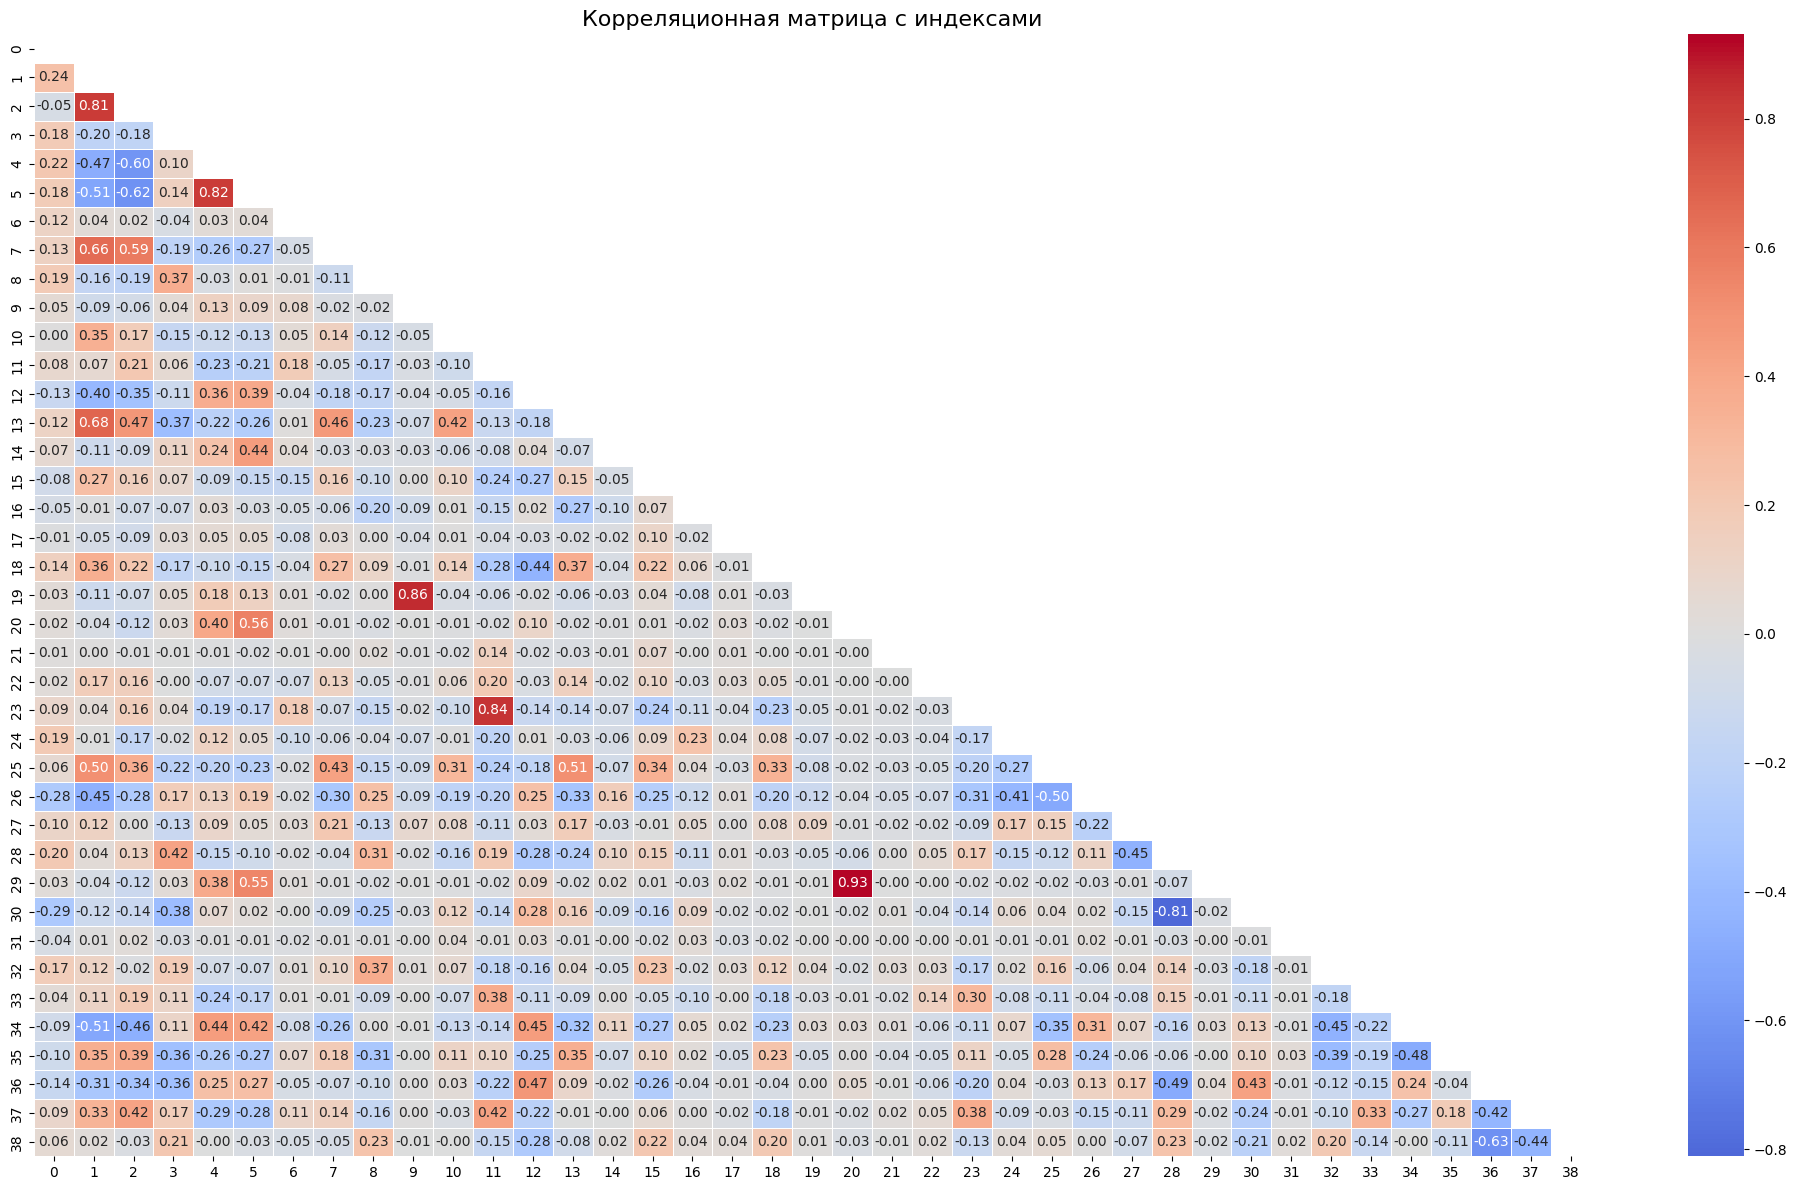

In [258]:
original_columns = df.columns

# Временно заменяем названия столбцов их индексами
df.columns = list(range(df.shape[1]))

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Корреляционная матрица с индексами', fontsize=16)
plt.tight_layout()
plt.show()

df.columns = original_columns

In [259]:
correlation_threshold = 0.6

corr_matrix = df.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

strong_correlations = upper_triangle.stack().reset_index()
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']

strong_correlations = strong_correlations[strong_correlations['Correlation'] > correlation_threshold]

display(strong_correlations)

,Variable 1,Variable 2,Correlation
38,engine_hp,engine_cylinders,0.811641
43,engine_hp,msrp,0.657144
49,engine_hp,high_performance,0.677589
76,engine_cylinders,highway_mpg,0.603323
77,engine_cylinders,city_mpg,0.615478
146,highway_mpg,city_mpg,0.821383
315,diesel,engine_fuel_type_diesel,0.861074
374,flex_fuel,engine_fuel_type_flex_fuel_(unleaded/e85),0.841358
578,engine_fuel_type_electric,transmission_type_direct_drive,0.930834
687,transmission_type_automatic,transmission_type_manual,0.810896


Вариантов несколько - либо использовать методы понижения размерности (PCA, факторный анализ, ...), либо выбрасывать переменные.

Также можно и оставить все переменные, но тогда использовать либо регуляризацию, либо непараметрические методы, наподобии случайного леса или градиентного бустинга.

Считаю, что лучше выбросить, чтобы не страдала интерпретируемость.

Мысли:
1. engine_hp точно остаётся, так как переменная сильно коррелирует с целевым признаком => придётся удалить engine_cylinders и high_performance

2. корреляция между highway_mpg и city_mpg тоже понятна. Не очень бы хотелось, но удалю, допустим, highway_mpg (будем считать, что признак о тратах бензина в городе важнее)

3. diesel и engine_fuel_type_diesel - тут всё понятно. Оставим столбец с коротким названием

4. Дальше аналогично

P.S: допускаю, что возможно не стоит выбрасывать переменные, например про трансмиссию... но я плохо разбираюсь в предметной области :). Возможно, их нужно было бы как-то отдельно по умному закодировать...

In [260]:
df = df.drop(columns = ['engine_cylinders', 'high_performance', 'highway_mpg', 'engine_fuel_type_diesel',
                        'engine_fuel_type_flex_fuel_(unleaded/e85)', 'transmission_type_direct_drive', 
                        'transmission_type_manual', 'vehicle_size_compact'])

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8085 entries, 0 to 8084
Data columns (total 31 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   year                                                           8085 non-null   int64  
 1   engine_hp                                                      8085 non-null   float64
 2   number_of_doors                                                8085 non-null   float64
 3   city_mpg                                                       8085 non-null   int64  
 4   popularity                                                     8085 non-null   int64  
 5   msrp                                                           8085 non-null   int64  
 6   crossover                                                      8085 non-null   int32  
 7   diesel                                                      

<Axes: >

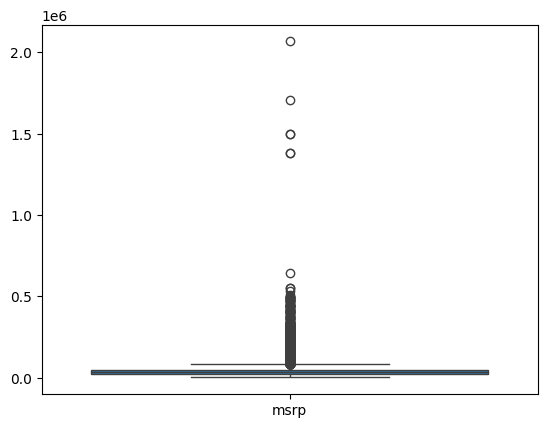

In [267]:
sns.boxplot(df[['msrp']])

In [270]:
pd.set_option('display.max_columns', None)
df.describe()

,year,engine_hp,number_of_doors,city_mpg,popularity,msrp,crossover,diesel,factory_tuner,flex_fuel,hatchback,hybrid,luxury,performance,auto_hashed,vehicle_style_hashed,engine_fuel_type_electric,engine_fuel_type_flex_fuel_(premium_unleaded_recommended/e85),engine_fuel_type_flex_fuel_(premium_unleaded_required/e85),engine_fuel_type_premium_unleaded_(recommended),engine_fuel_type_premium_unleaded_(required),engine_fuel_type_regular_unleaded,transmission_type_automated_manual,transmission_type_automatic,transmission_type_unknown,driven_wheels_all_wheel_drive,driven_wheels_four_wheel_drive,driven_wheels_front_wheel_drive,driven_wheels_rear_wheel_drive,vehicle_size_large,vehicle_size_midsize
count,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8.085000e+03,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000,8085.000000
mean,2012.058751,274.689301,3.413976,19.552628,1499.555473,5.010296e+04,0.250588,0.025356,0.076438,0.147310,0.146073,0.042424,0.405566,0.257019,1000.803463,29.941620,0.001608,0.003216,0.006679,0.182684,0.244156,0.433766,0.075572,0.712554,0.000371,0.267038,0.079901,0.356092,0.296970,0.229932,0.394187
std,6.317599,115.072511,0.898169,7.160153,1413.839229,7.034154e+04,0.433378,0.157212,0.265714,0.354436,0.353201,0.201567,0.491032,0.437017,561.363980,12.568006,0.040069,0.056621,0.081457,0.386431,0.429612,0.495624,0.264328,0.452599,0.019260,0.442440,0.271157,0.478872,0.456951,0.420815,0.488706
min,1990.000000,55.000000,2.000000,7.000000,2.000000,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,192.000000,2.000000,16.000000,549.000000,2.592000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,526.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,264.000000,4.000000,18.000000,1013.000000,3.501000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,320.000000,4.000000,22.000000,2009.000000,4.874500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1485.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,2017.000000,1001.000000,4.000000,137.000000,5657.000000,2.065902e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1992.000000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Есть несколько выбросов, судя по msrp, popularity, engine_hp. Посмотрим подробнее

In [273]:
df[df['popularity'] == np.max(df['popularity'])]['auto_hashed'].unique()

array([ 809, 1399, 1004,  530, 1070,  591,  130,  325, 1409, 1938,  954,
        960, 1923, 1460, 1735, 1433, 1867,  322,  660, 1357, 1475, 1642,
       1476,  568,  806,  759, 1243,  172,  644,  355,  454], dtype=int64)

<Axes: xlabel='popularity', ylabel='Count'>

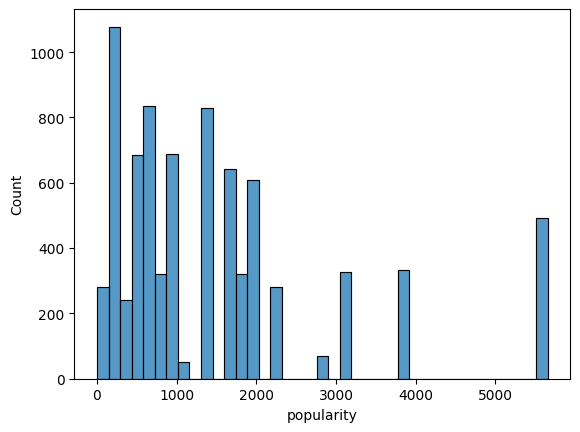

In [280]:
sns.histplot(df['popularity'])

Судя по popularity - высокие значения, это не столько выбросы, сколько отдельная когорта

In [278]:
print(df[df['msrp'] > np.quantile(df['msrp'], 0.9)]['auto_hashed'].unique())
print(f'len = {len(df[df['msrp'] > np.quantile(df['msrp'], 0.9)])}')

[ 452 1935  378 1298  104  848 1568  335 1812  210  923 1148 1021 1226
   49 1138 1289  986 1972 1620  230  515 1584 1800 1982 1642  320  391
 1282  754  411  111 1922  285  594 1728 1582  854 1017 1310 1316 1859
 1989 1501 1855 1740  385 1052  852 1199 1600 1958  809  637  805  302
    8 1457  850 1730  139  973  690 1699 1681  760  728  924  578  317
  534  553  691 1595 1300  879 1037 1797 1751 1597 1307 1978  279 1992
 1028  163  306 1404 1623  610  556 1881 1027 1757  655  856 1788 1223
 1485 1198 1599 1389  218  697 1396 1041 1948 1237  396  449 1933 1004
   96 1047  125 1186 1147 1601 1084 1098  537  204   47  516 1382 1871
  440  576  601  627 1494 1711  621 1616]
len = 809


<Axes: xlabel='msrp', ylabel='Count'>

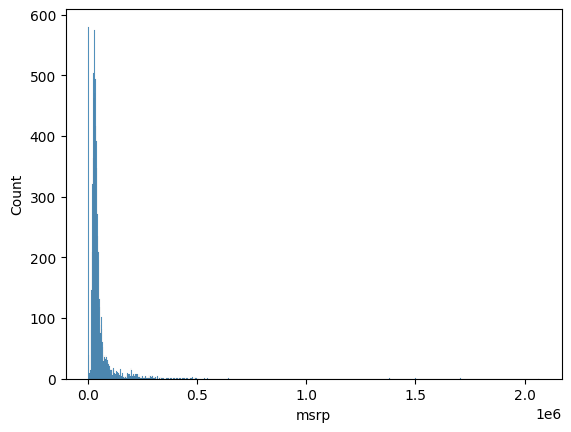

In [281]:
sns.histplot(df['msrp'])

[1935  378  965 1177 1298  104  848 1568  335 1812  210  923 1148 1021
 1226   49 1138 1289  986 1972 1620  515 1584  209 1800 1982 1642  320
 1484 1282  754  643  411  111 1788  547 1922  285  594 1728 1582  854
 1017 1310 1316 1859 1989  391 1501 1047  385  996  115 1199 1600 1958
  809  637  805  302    8 1457 1699 1681  760  728  924  578  317  534
  553  691 1595 1300 1037 1797 1751 1597 1307 1978 1992  163  306 1404
 1623  610  556 1881 1027  568 1757  655 1223 1485 1198 1599  218  697
 1396 1041 1948 1257 1237  436  853  396  449   92  967 1933  759 1243
   96  125 1186 1147 1084 1302 1098  537  204   47 1382 1871  440  576
  601  627 1619 1494  545 1711]
len = 768


<Axes: xlabel='engine_hp', ylabel='Count'>

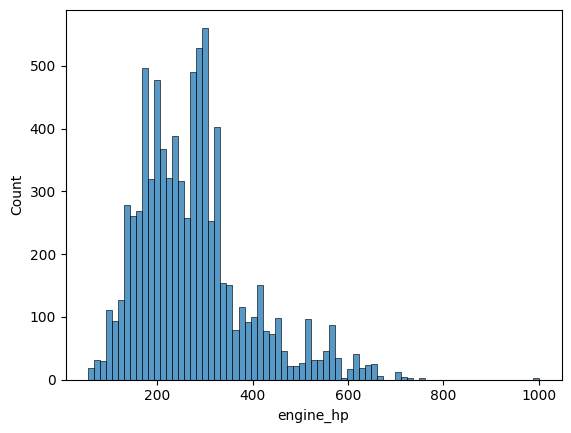

In [282]:
print(df[df['engine_hp'] > np.quantile(df['engine_hp'], 0.9)]['auto_hashed'].unique())
print(f'len = {len(df[df['engine_hp'] > np.quantile(df['engine_hp'], 0.9)])}')
sns.histplot(df['engine_hp'])

Аналогично. Причём, даже если эти подвыборки пересекаются, то всё это составляет около 10% всей выборки. У меня большие сомнения в целесообразности удаления таких строк.